In [29]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as inputData
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [30]:
data = inputData.read_data_sets('data', one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [31]:
def plotNumbers(imset, valset, dimen):
    fig, axis = plt.subplots(dimen[0],dimen[1])

    for pos, sub in enumerate(axis.flat):
        sub.imshow(imset[pos].reshape((28,28)))
        sub.set_xticks([])
        sub.set_yticks([])
        sub.set_xlabel('pred:%r' %valset[pos])
    plt.show()

In [64]:
num_of_epochs=400
batch_size = 100
accu_list = []
epoch_size = int(len(data.train.labels)/batch_size)

L1=200
L2=100
L3=60
L4=30
num_of_inputs=784
num_of_outputs=10

X = tf.placeholder(tf.float32, shape=[None, num_of_inputs])
Y_ori = tf.placeholder(tf.float32, shape=[None, num_of_outputs])

W1 = tf.Variable(initial_value=tf.truncated_normal([num_of_inputs, L1], stddev=0.1))
W2 = tf.Variable(initial_value=tf.truncated_normal([L1, L2], stddev=0.1))
W3 = tf.Variable(initial_value=tf.truncated_normal([L2, L3], stddev=0.1))
W4 = tf.Variable(initial_value=tf.truncated_normal([L3, L4], stddev=0.1))
W5 = tf.Variable(initial_value=tf.truncated_normal([L4, num_of_outputs], stddev=0.1))

b1 = tf.Variable(initial_value=tf.ones(L1)/10)
b2 = tf.Variable(initial_value=tf.ones(L2)/10)
b3 = tf.Variable(initial_value=tf.ones(L3)/10)
b4 = tf.Variable(initial_value=tf.ones(L4)/10)
b5 = tf.Variable(initial_value=tf.zeros(num_of_outputs))

lg1 = tf.matmul(X, W1) + b1
Y1 = tf.nn.relu(lg1)

lg2 = tf.matmul(Y1, W2) + b2
Y2 = tf.nn.relu(lg2)

lg3 = tf.matmul(Y2, W3) + b3
Y3 = tf.nn.relu(lg3)

lg4 = tf.matmul(Y3, W4) + b4
Y4 = tf.nn.relu(lg4)

lg5 = tf.matmul(Y4, W5) + b5
Y_pred = tf.nn.softmax(lg5)

cros_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=lg5, labels=Y_ori)
cost = tf.reduce_mean(cros_entropy)

optimizer = tf.train.AdamOptimizer(0.003)
trainer = optimizer.minimize(cost)

correct_prediction = tf.equal(tf.argmax(Y_pred, axis=1), tf.argmax(Y_ori, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for val in range(epoch_size*num_of_epochs):
    train_batch_x, train_batch_y = data.train.next_batch(batch_size)
    sess.run(trainer, feed_dict={X: train_batch_x, Y_ori: train_batch_y})

    if (val/epoch_size)%5==0:
        accu_list.append(sess.run(accuracy, feed_dict={X: data.test.images, Y_ori: data.test.labels}))

print(accu_list)

[0.1485, 0.9763, 0.9805, 0.9799, 0.9784, 0.98, 0.981, 0.9795, 0.9823, 0.9803, 0.9793, 0.9796, 0.9783, 0.9824, 0.9804, 0.9765, 0.9808, 0.9827, 0.9812, 0.9803, 0.9819, 0.9818, 0.9811, 0.9791, 0.9804, 0.9788, 0.9801, 0.9767, 0.9802, 0.9773, 0.9812, 0.9814, 0.9821, 0.9828, 0.9799, 0.9806, 0.9791, 0.9817, 0.9777, 0.9821, 0.9824, 0.9814, 0.9805, 0.9787, 0.9835, 0.9834, 0.9835, 0.9813, 0.9812, 0.9834, 0.9821, 0.9809, 0.983, 0.9825, 0.9795, 0.9828, 0.9838, 0.9841, 0.9846, 0.9847, 0.9844, 0.9845, 0.9778, 0.9812, 0.9794, 0.9809, 0.9815, 0.9817, 0.9818, 0.9818, 0.982, 0.981, 0.9778, 0.9798, 0.9814, 0.9797, 0.9824, 0.9807, 0.9821, 0.9817]


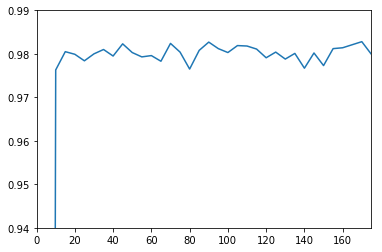

In [65]:
xVal = np.arange(5,num_of_epochs+5,5)
plt.plot(xVal, accu_list[:])
plt.axis([0,175,0.94,0.99])
plt.show()

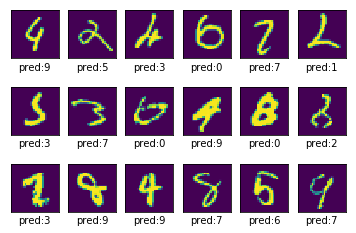

217

In [66]:
prediction = tf.argmax(Y_pred, axis=1)

predict_bool = sess.run(correct_prediction, feed_dict={X: data.test.images, Y_ori: data.test.labels})
predict_bool_inv = [not val for val in predict_bool]
failed_images = data.test.images[predict_bool_inv]

failed_pred = sess.run(prediction, feed_dict={X:failed_images})

plotNumbers(failed_images[0:18], failed_pred[0:18], dimen=(3,6))
len(failed_images)

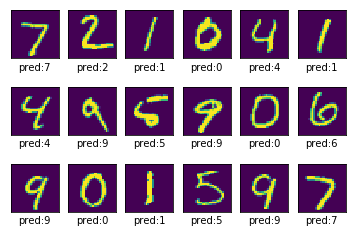

In [67]:
successful_images = data.test.images[predict_bool]
successful_pred = sess.run(prediction, feed_dict={X:successful_images})

plotNumbers(successful_images[0:18], successful_pred[0:18], dimen=(3,6))

In [68]:
test_pred = sess.run(prediction, feed_dict={X: data.test.images})
test_true = data.test.labels.argmax(axis=1)

confu_matri = confusion_matrix(test_true, test_pred)
print(confu_matri)

[[ 969    1    0    3    0    1    3    1    2    0]
 [   0 1123    1    7    0    0    2    1    1    0]
 [   3    2  999   12    1    1    2    5    7    0]
 [   0    0    1  997    0    1    0    4    2    5]
 [   0    0    0   15  941    0    4    4    2   16]
 [   2    0    0   12    0  868    6    1    2    1]
 [   2    2    0    2    0    2  947    0    3    0]
 [   2    2    3    6    0    0    0 1007    2    6]
 [   1    1    2   11    0    4    3    3  945    4]
 [   2    3    0    8    3    1    0    4    1  987]]


In [ ]:
#epoch:175
[0.2547, 0.9753, 0.9749, 0.9804, 0.9799, 0.9732, 0.9786, 0.9761, 0.9799, 0.9796, 0.9797, 0.9812, 0.9763, 0.9787, 0.9823, 0.9796, 
 0.9806, 0.9812, 0.9793, 0.9796, 0.9822, 0.9803, 0.9803, 0.9814, 0.9816, 0.9821, 0.982, 0.9815, 0.9806, 0.9808, 0.9826, 0.9786, 
 0.9819, 0.9811, 0.9802]
#num of error files: 175

#epoch:400
[0.1485, 0.9763, 0.9805, 0.9799, 0.9784, 0.98, 0.981, 0.9795, 0.9823, 0.9803, 0.9793, 0.9796, 0.9783, 0.9824, 0.9804, 0.9765, 
 0.9808, 0.9827, 0.9812, 0.9803, 0.9819, 0.9818, 0.9811, 0.9791, 0.9804, 0.9788, 0.9801, 0.9767, 0.9802, 0.9773, 0.9812, 0.9814, 
 0.9821, 0.9828, 0.9799, 0.9806, 0.9791, 0.9817, 0.9777, 0.9821, 0.9824, 0.9814, 0.9805, 0.9787, 0.9835, 0.9834, 0.9835, 0.9813, 
 0.9812, 0.9834, 0.9821, 0.9809, 0.983, 0.9825, 0.9795, 0.9828, 0.9838, 0.9841, 0.9846, 0.9847, 0.9844, 0.9845, 0.9778, 0.9812, 
 0.9794, 0.9809, 0.9815, 0.9817, 0.9818, 0.9818, 0.982, 0.981, 0.9778, 0.9798, 0.9814, 0.9797, 0.9824, 0.9807, 0.9821, 0.9817]
#num of error files: 217